In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
import itertools

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from scipy.io import loadmat
import joblib
import io
import cv2
import joblib
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler, TomekLinks 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from keras import layers
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense
from keras.layers import MaxPool2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model
from tensorflow import keras
from keras.utils import np_utils
import keras.optimizers as opt
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.models import Sequential, load_model
from keras import regularizers
import random
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
IMAGE_SIZE=48
data_path = '/content/drive/MyDrive/IR Project CODEBASE/Dataset/fer2013.csv' 
data = pd.read_csv(data_path)
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
def preprocess(X):
    X = np.array([np.fromstring(image, np.uint8, sep=' ') for image in X])
    X = X/255.0
    X = X.reshape(-1, 48, 48, 1)
    return X

In [ ]:

train_data = data[data['Usage']=='Training'].drop(labels=['Usage'], axis=1)
val_data = data[data['Usage']=='PrivateTest'].drop(labels=['Usage'], axis=1)
test_data = data[data['Usage']=='PublicTest'].drop(labels=['Usage'], axis=1)
train_data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:

Y_train = train_data["emotion"]
Y_val = val_data["emotion"]
Y_test = test_data["emotion"]

X_train = train_data["pixels"]
X_val = val_data["pixels"]
X_test = test_data["pixels"]
print("Training shape---->",X_train.shape,Y_train.shape)
print("Validation shape---->",X_val.shape,Y_val.shape)
print("Testing shape---->",X_test.shape,Y_test.shape)

Training shape----> (28709,) (28709,)
Validation shape----> (3589,) (3589,)
Testing shape----> (3589,) (3589,)


In [ ]:
Y_train = pd.concat([Y_train,Y_val])

In [ ]:
Y_train.shape

(32298,)

In [ ]:
X_train = pd.concat([X_train,X_val])
X_train.shape


(32298,)

### Data before undersampling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts per emotion in testing set')

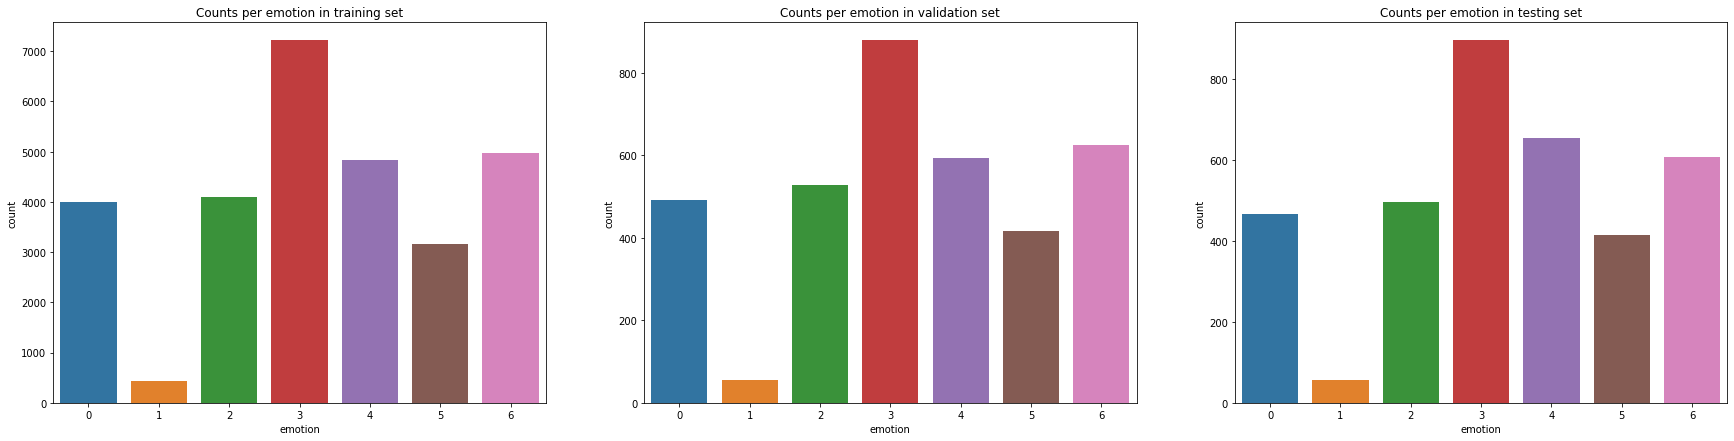

In [ ]:
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = sns.countplot(Y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set")

plt.subplot(1,3,2)
ax = sns.countplot(Y_val)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in validation set")

plt.subplot(1,3,3)
ax = sns.countplot(Y_test)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in testing set")

In [ ]:
# X_train

### undersampling

In [ ]:
def underSample(data, y):
  underSampler = RandomUnderSampler(random_state = 42) 
  X_undersampled, y_undersampled = underSampler.fit_resample(data, y)
  # X_undersampled = X_undersampled.reshape(X_undersampled.shape[0],IMAGE_SIZE, IMAGE_SIZE)
  return X_undersampled, y_undersampled 

In [ ]:
X_train1, y_train1 = underSample(X_train.values.reshape(-1,1), Y_train)


In [ ]:
# X_train1
def preprocess1(X):
    # print([image for image in X])
    # for image in X:
    #   print([np.fromstring(image[0], np.uint8, sep=' ') for image in X])
      # break

    X = np.array([np.fromstring(image[0], np.uint8, sep=' ') for image in X])
    X = X/255.0
    X = X.reshape(-1, 48, 48, 1)
    return X

x=preprocess1(X_train1)

In [ ]:
# x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts per emotion in training set after undersampling')

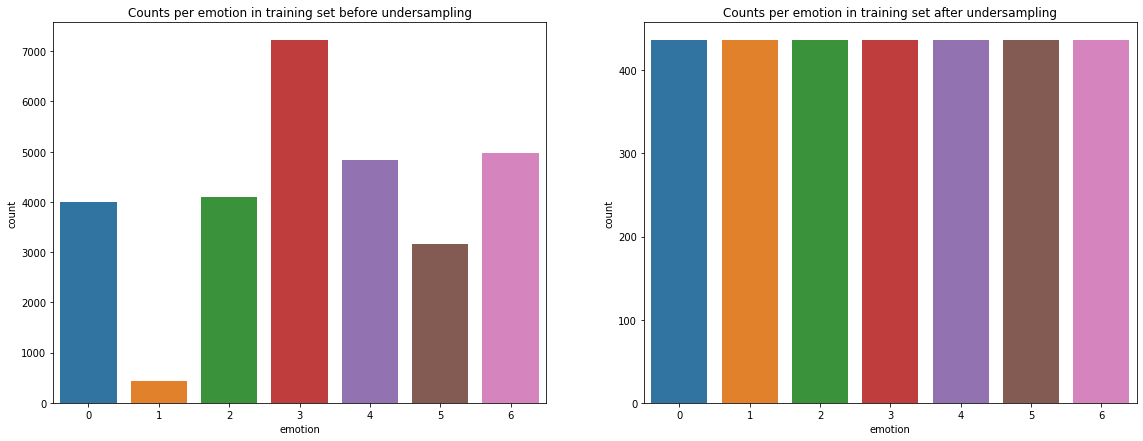

In [ ]:
plt.figure(figsize=(30, 7))
# plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = sns.countplot(Y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set before undersampling")

plt.subplot(1,3,2)
ax = sns.countplot(y_train1)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set after undersampling")


### convert labels to categorical values for prediction

In [ ]:
print("Is any label null in training set:", Y_train.isnull().any())
print("Is any label null in validation set:", Y_val.isnull().any())
print("Is any label null in testing set:", Y_test.isnull().any())


Y_train = to_categorical(Y_train, num_classes=7)
Y_train1 = to_categorical(y_train1,num_classes=7)
Y_val = to_categorical(Y_val, num_classes=7)
Y_test = to_categorical(Y_test, num_classes=7)

Is any label null in training set: False
Is any label null in validation set: False
Is any label null in testing set: False


### CNN Model


In [ ]:
X_train = preprocess(X_train)
X_val = preprocess(X_val)
X_test = preprocess(X_test)
# print(X_train.shape,X_val.shape,X_test.shape)
# X_train1 = preprocess1(X_train1)

# MODEL 1

In [ ]:
def emotion_recognition(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = Conv2D(64, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = MaxPooling2D((2,2))(X)
  X = Flatten()(X)
  X = Dense(200, activation='relu')(X)
  X = Dropout(0.6)(X)
  X = Dense(7, activation = 'softmax')(X)

  model = Model(inputs=X_input, outputs=X)

  return model

In [ ]:
model = emotion_recognition((48,48,1))
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                           

In [ ]:
history = model.fit(X_train, Y_train, validation_data=[X_test, Y_test], epochs=30, batch_size = 100)


Epoch 1/30
323/323 [==============================] - 23s 72ms/step - loss: 1.6178 - accuracy: 0.3654 - val_loss: 1.5432 - val_accuracy: 0.4104
Epoch 2/30
323/323 [==============================] - 22s 69ms/step - loss: 1.5114 - accuracy: 0.4132 - val_loss: 1.4141 - val_accuracy: 0.4620
Epoch 3/30
323/323 [==============================] - 22s 68ms/step - loss: 1.4356 - accuracy: 0.4478 - val_loss: 1.3567 - val_accuracy: 0.4843
Epoch 4/30
323/323 [==============================] - 22s 68ms/step - loss: 1.3701 - accuracy: 0.4745 - val_loss: 1.3193 - val_accuracy: 0.4985
Epoch 5/30
323/323 [==============================] - 22s 68ms/step - loss: 1.3168 - accuracy: 0.4982 - val_loss: 1.3242 - val_accuracy: 0.4982
Epoch 6/30
323/323 [==============================] - 23s 70ms/step - loss: 1.2722 - accuracy: 0.5148 - val_loss: 1.2568 - val_accuracy: 0.5269
Epoch 7/30
323/323 [==============================] - 22s 68ms/step - loss: 1.2310 - accuracy: 0.5324 - val_loss: 1.2417 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/IR Project CODEBASE/cnn_model_3.h5')


In [ ]:
model.evaluate(X_test,Y_test)

113/113 [==============================] - 1s 10ms/step - loss: 1.4529 - accuracy: 0.5770


[1.452853798866272, 0.57704097032547]

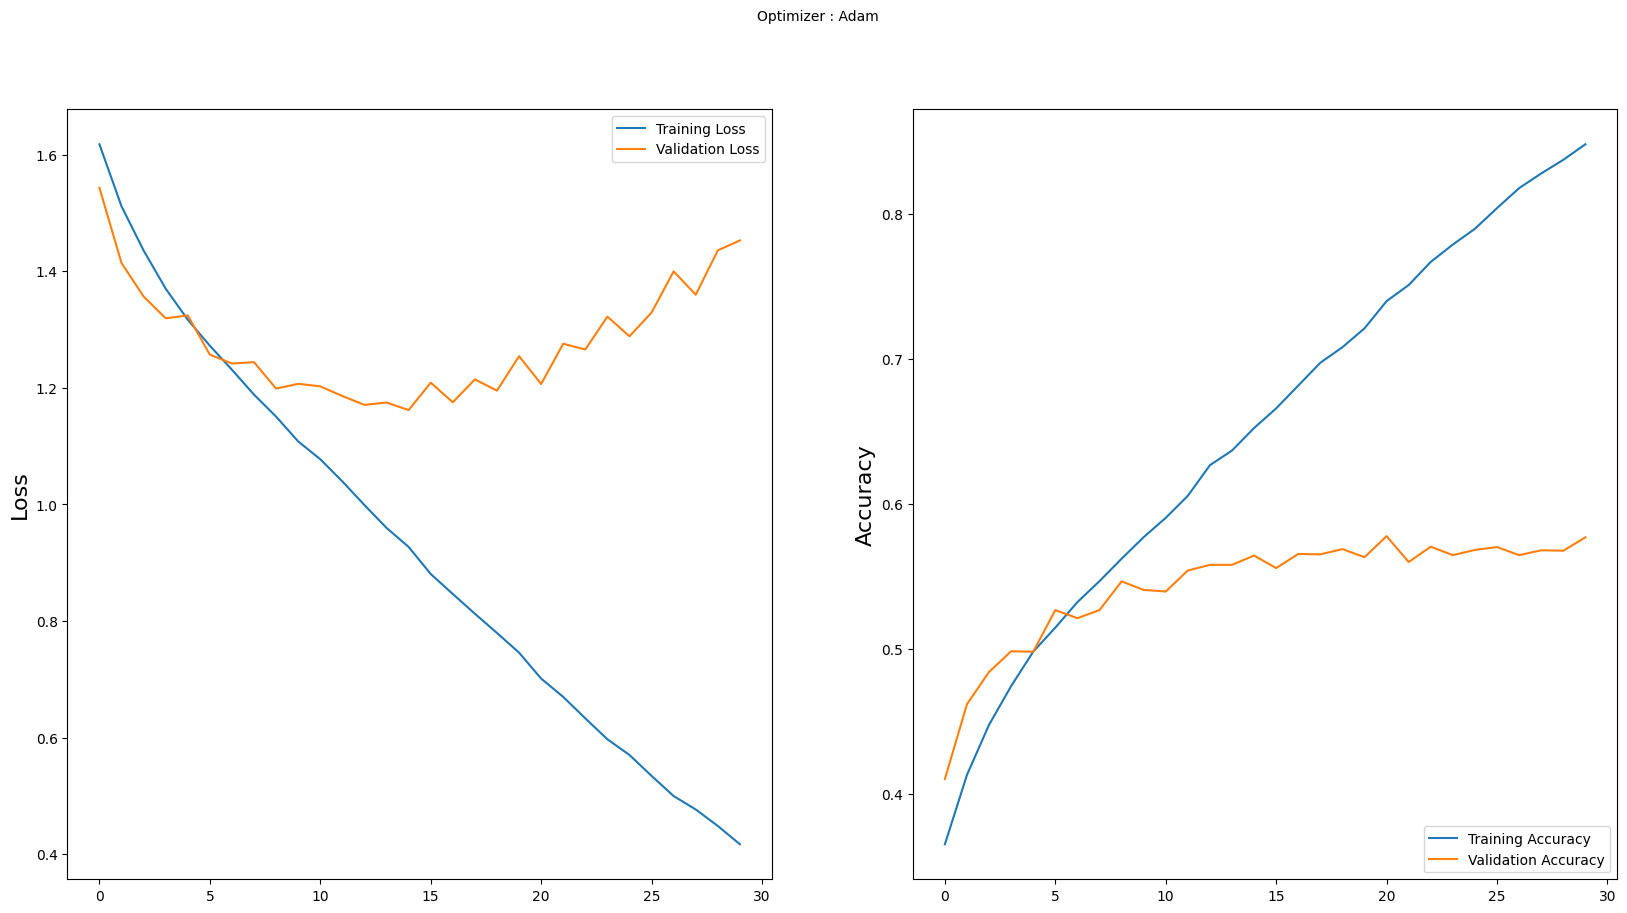

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
fig1 = plt.gcf()

plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
fig1.savefig('/content/drive/MyDrive/IR Project CODEBASE/FIGURES/CNN-model-acuuracy-plot2.png',dpi=300)
plt.show()


# Model 2 (undersampled)

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(X_train1, Y_train1, validation_data=[X_test, Y_test], epochs=50, batch_size = 100)


Epoch 1/50
31/31 [==============================] - 17s 124ms/step - loss: 2.8156 - accuracy: 0.1832 - val_loss: 1.9176 - val_accuracy: 0.2494
Epoch 2/50
31/31 [==============================] - 3s 83ms/step - loss: 2.3748 - accuracy: 0.2104 - val_loss: 2.1531 - val_accuracy: 0.0156
Epoch 3/50
31/31 [==============================] - 3s 86ms/step - loss: 2.1836 - accuracy: 0.2389 - val_loss: 2.1386 - val_accuracy: 0.2494
Epoch 4/50
31/31 [==============================] - 3s 87ms/step - loss: 2.0047 - accuracy: 0.2779 - val_loss: 2.0040 - val_accuracy: 0.2494
Epoch 5/50
31/31 [==============================] - 3s 82ms/step - loss: 1.9386 - accuracy: 0.2942 - val_loss: 1.9834 - val_accuracy: 0.2494
Epoch 6/50
31/31 [==============================] - 2s 80ms/step - loss: 1.8757 - accuracy: 0.3263 - val_loss: 2.0502 - val_accuracy: 0.1691
Epoch 7/50
31/31 [==============================] - 3s 83ms/step - loss: 1.7962 - accuracy: 0.3372 - val_loss: 2.1372 - val_accuracy: 0.1647
Epoch 8/50


In [ ]:
model.save('/content/drive/MyDrive/IR Project CODEBASE/cnn_model_undersampled.h5')


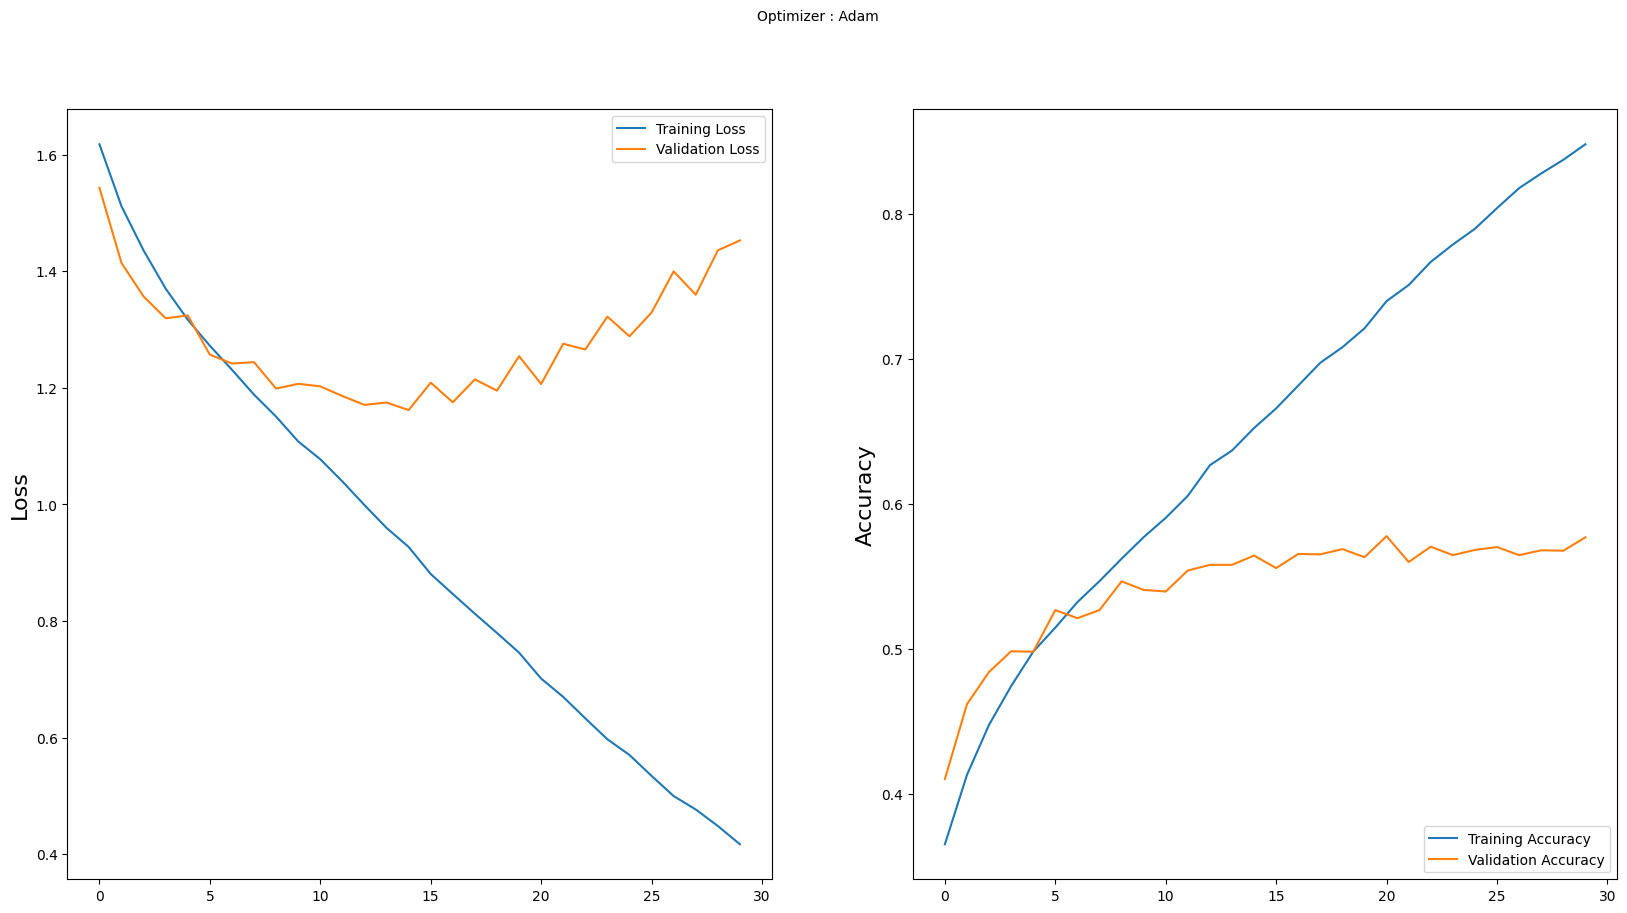

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
fig1 = plt.gcf()

plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
fig1.savefig('/content/drive/MyDrive/IR Project CODEBASE/FIGURES/CNN-model-acuuracy-plot_undersampled.png',dpi=300)
plt.show()


# Model 3 (best)

In [ ]:

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate= 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=[X_val, Y_val], epochs=50, batch_size = 100)

Epoch 1/50
288/288 [==============================] - 26s 44ms/step - loss: 1.7976 - accuracy: 0.3074 - val_loss: 2.1318 - val_accuracy: 0.2449
Epoch 2/50
288/288 [==============================] - 12s 40ms/step - loss: 1.4366 - accuracy: 0.4480 - val_loss: 1.5055 - val_accuracy: 0.4330
Epoch 3/50
288/288 [==============================] - 11s 40ms/step - loss: 1.2655 - accuracy: 0.5162 - val_loss: 1.5100 - val_accuracy: 0.4333
Epoch 4/50
288/288 [==============================] - 12s 41ms/step - loss: 1.1900 - accuracy: 0.5462 - val_loss: 1.5940 - val_accuracy: 0.3812
Epoch 5/50
288/288 [==============================] - 12s 41ms/step - loss: 1.1282 - accuracy: 0.5695 - val_loss: 1.3088 - val_accuracy: 0.5010
Epoch 6/50
288/288 [==============================] - 12s 40ms/step - loss: 1.0761 - accuracy: 0.5890 - val_loss: 1.1721 - val_accuracy: 0.5581
Epoch 7/50
288/288 [==============================] - 12s 41ms/step - loss: 1.0296 - accuracy: 0.6111 - val_loss: 1.1015 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/IR Project CODEBASE/weights_fin.h5')


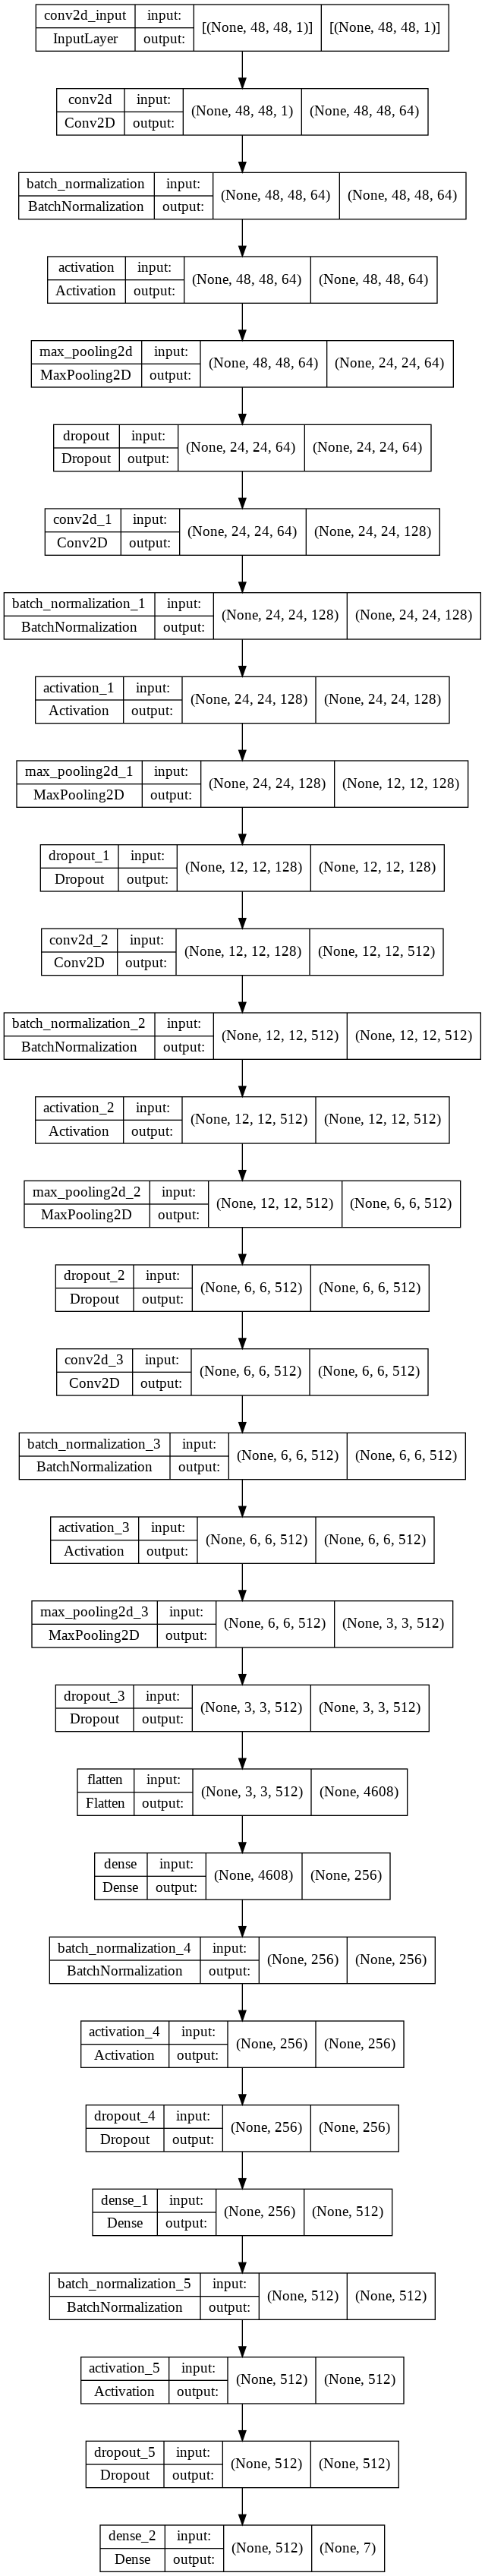

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

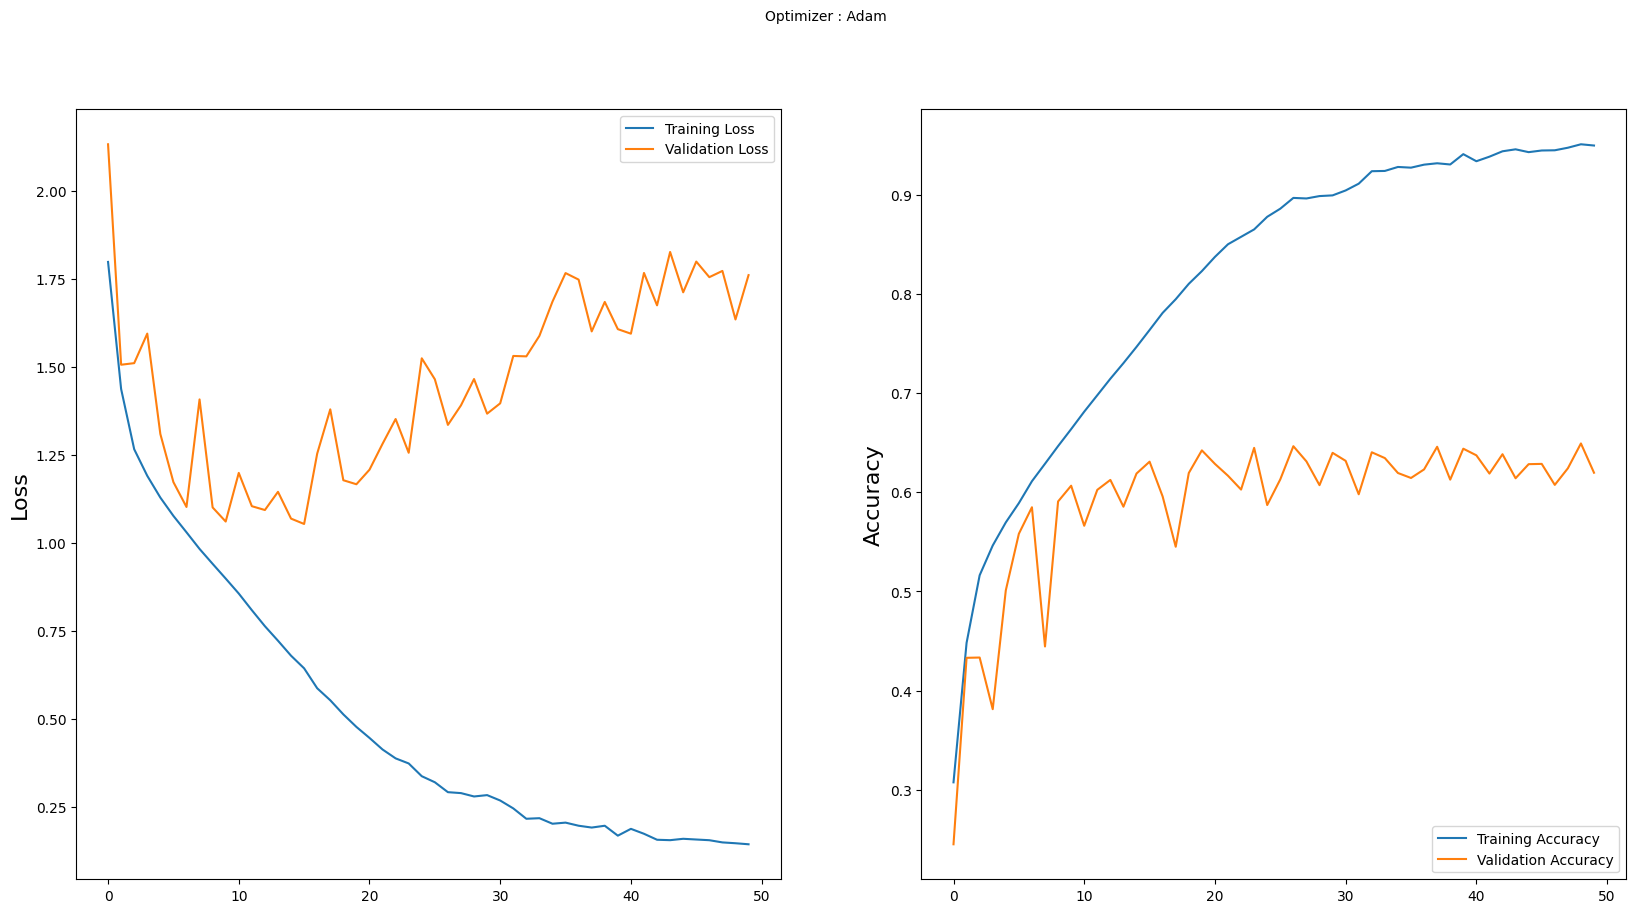

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
fig1 = plt.gcf()

plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
fig1.savefig('/content/drive/MyDrive/IR Project CODEBASE/FIGURES/CNN-model-best-acuuracy-plot.png',dpi=300)
plt.show()


In [ ]:
model.evaluate(X_test,Y_test)


113/113 [==============================] - 2s 14ms/step - loss: 1.8858 - accuracy: 0.6328


[1.8858305215835571, 0.6327667832374573]

# Model 4

In [ ]:
model = Sequential()

model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu",input_shape=(48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 256)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=[X_val, Y_val], epochs=50, batch_size = 100)
# model.save('/content/drive/MyDrive/IR Project CODEBASE/cnn_model2.h5')


Epoch 1/50
288/288 [==============================] - 50s 132ms/step - loss: 2.0720 - accuracy: 0.2412 - val_loss: 1.8231 - val_accuracy: 0.2446
Epoch 2/50
288/288 [==============================] - 34s 118ms/step - loss: 1.8121 - accuracy: 0.2512 - val_loss: 1.8512 - val_accuracy: 0.2452
Epoch 3/50
288/288 [==============================] - 35s 121ms/step - loss: 1.7745 - accuracy: 0.2531 - val_loss: 1.7833 - val_accuracy: 0.2558
Epoch 4/50
288/288 [==============================] - 35s 122ms/step - loss: 1.7259 - accuracy: 0.2693 - val_loss: 1.6713 - val_accuracy: 0.3034
Epoch 5/50
288/288 [==============================] - 35s 121ms/step - loss: 1.6764 - accuracy: 0.2882 - val_loss: 1.6985 - val_accuracy: 0.3274
Epoch 6/50
288/288 [==============================] - 35s 121ms/step - loss: 1.6520 - accuracy: 0.3035 - val_loss: 1.6981 - val_accuracy: 0.3210
Epoch 7/50
288/288 [==============================] - 35s 121ms/step - loss: 1.6103 - accuracy: 0.3286 - val_loss: 1.6336 - val_ac

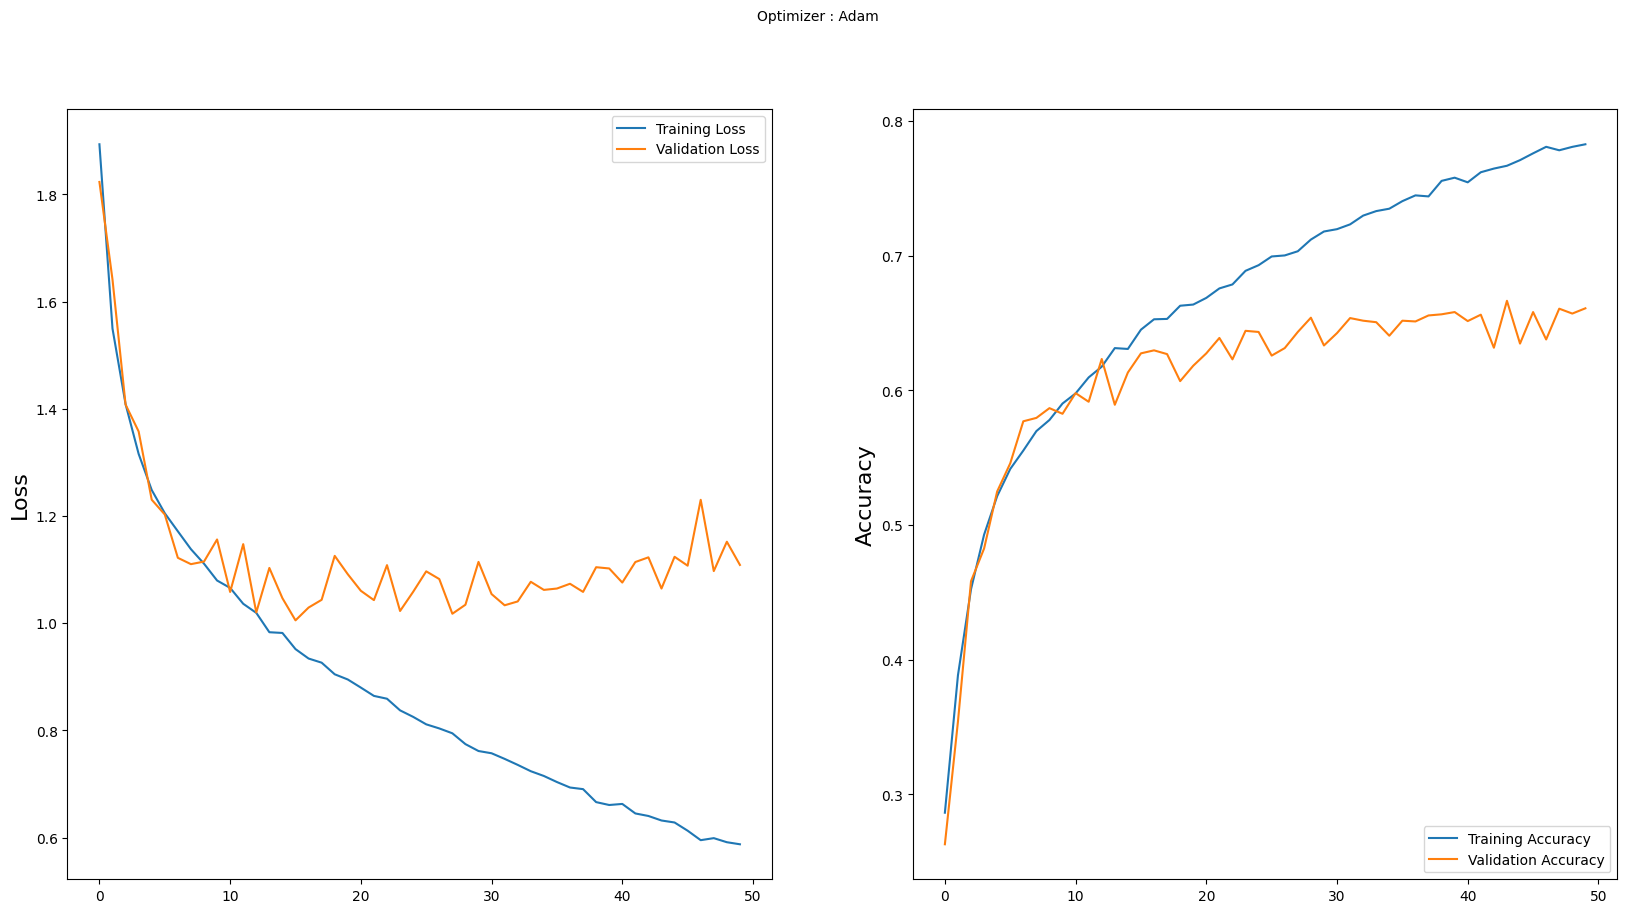

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
fig1 = plt.gcf()

plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
fig1.savefig('/content/drive/MyDrive/IR Project CODEBASE/FIGURES/CNN-model-acuuracy-plot.png',dpi=300)
plt.show()


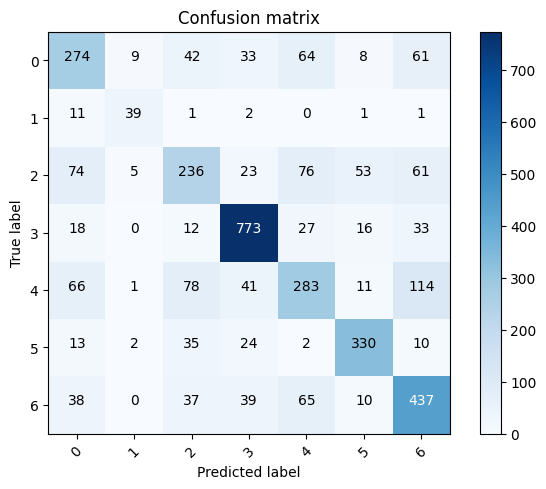

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/MyDrive/IR Project CODEBASE/FIGURES/CNN-model-confusion-matrix.png',dpi=300)


# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 